In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
#set variable values

SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres"
SQL_IP = "localhost"
PORT = 5432
DATABASE = "crowdfunding_db"

In [3]:
#Create the connection

connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
-----------
contact_id INTEGER
first_name VARCHAR(50)
last_name VARCHAR(100)
email VARCHAR(150)
last_updated TIMESTAMP

campaign
-----------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(300)
description VARCHAR(500)
goal INTEGER
pledged INTEGER
outcome VARCHAR(20)
backers_count INTEGER
country VARCHAR(5)
currency VARCHAR(20)
launched_date DATE
end_date DATE
category_id VARCHAR(10)
subcategory_id VARCHAR(10)
last_updated TIMESTAMP

category
-----------
category_id VARCHAR(10)
category VARCHAR(100)
last_updated TIMESTAMP

subcategory
-----------
subcategory_id VARCHAR(20)
subcategory VARCHAR(100)
last_updated TIMESTAMP



In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
print(list(Base.classes))

[<class 'sqlalchemy.ext.automap.campaign'>, <class 'sqlalchemy.ext.automap.contacts'>, <class 'sqlalchemy.ext.automap.subcategory'>, <class 'sqlalchemy.ext.automap.category'>]


In [6]:
# Question 1: Which Category pledged the most
query0 = """
    SELECT ca.category, sum(c.pledged) as total_pledged
    FROM campaign as c
    JOIN category as ca on c.category_id = ca.category_id
    GROUP BY ca.category
    ORDER BY total_pledged asc;
"""

df0 = pd.read_sql(text(query0), con=engine)
df0.total_pledged = df0.total_pledged/1000000
df0

,category,total_pledged
0,journalism,0.036176
1,photography,1.223931
2,food,1.735179
3,games,2.015817
4,publishing,3.149827
5,technology,3.833725
6,music,7.480097
7,film & video,7.510076
8,theater,15.763227


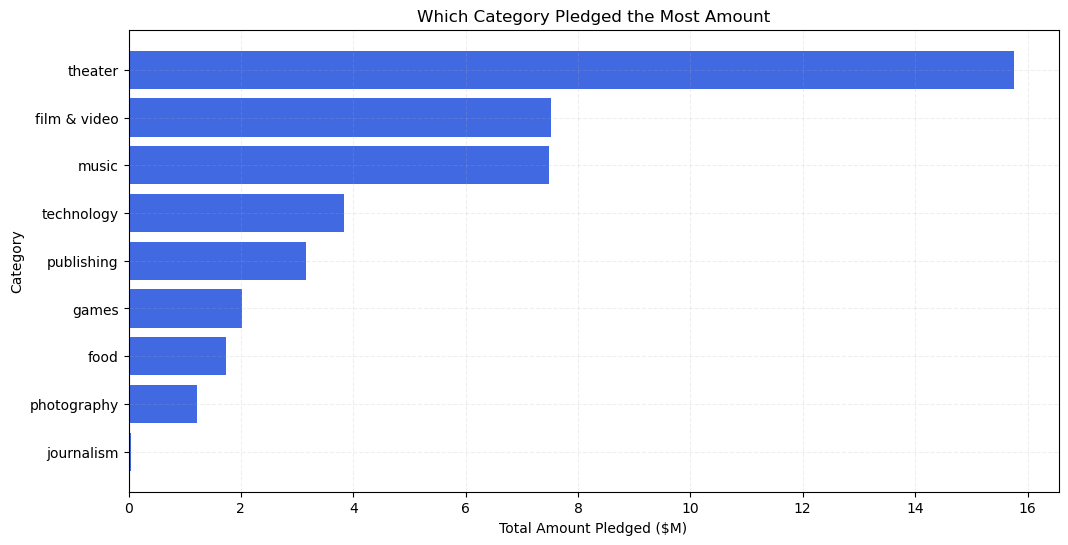

In [7]:
# Question 1 Visualization
x = df0.category
y = df0.total_pledged
plt.figure(figsize=(12,6))
plt.barh(x, y, color='royalblue')
plt.xlabel('Total Amount Pledged ($M)')
plt.ylabel('Category')
plt.title('Which Category Pledged the Most Amount')
plt.grid(linestyle="--", alpha=.2)
plt.show()

In [8]:
# Question 2: Which Subcategory pledged the most
query = """
    SELECT s.subcategory, sum(c.pledged) as total_pledged
    FROM campaign as c
    JOIN subcategory as s on c.subcategory_id = s.subcategory_id
    GROUP BY s.subcategory
    ORDER BY total_pledged asc;
"""

df = pd.read_sql(text(query), con=engine)
df.total_pledged = df.total_pledged/1000000
df

,subcategory,total_pledged
0,audio,0.036176
1,world music,0.225563
2,metal,0.281185
3,radio & podcasts,0.285580
4,jazz,0.550966
5,science fiction,0.559713
6,television,0.736391
7,electric music,0.781148
8,translations,0.837441
9,shorts,0.855820


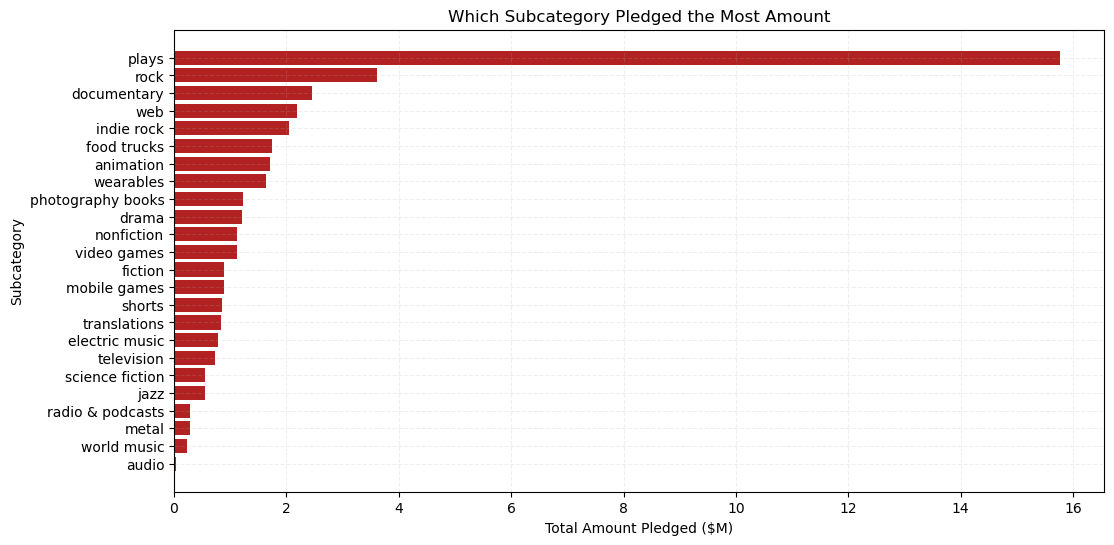

In [9]:
# Question 2 Visualization
x = df.subcategory
y = df.total_pledged
plt.figure(figsize=(12,6))
plt.barh(x, y, color='firebrick')
plt.xlabel('Total Amount Pledged ($M)')
plt.ylabel('Subcategory')
plt.title('Which Subcategory Pledged the Most Amount')
plt.grid(linestyle="--", alpha=.2)
plt.show()

In [10]:
# Question 3: Who Pledged the Most and return emails for future callbacks
query2 = """
    SELECT ct.first_name, ct.last_name, ct.email, c.pledged as total_pledged
    FROM campaign as c
    JOIN contacts as ct on c.contact_id = ct.contact_id
    ORDER BY total_pledged desc
    LIMIT 50;
"""

df2 = pd.read_sql(text(query2), con=engine)
df2

,first_name,last_name,email,total_pledged
0,Casey,Flores,casey.flores@baggio.org,199110
1,Ludovica,Arellano,ludovica.arellano@morandi-argento.com,198628
2,Severino,Linares,severino.linares@angeli.com,197728
3,Cornelio,Guardado,cornelio.guardado@gmail.com,197024
4,Roberto,Guyot,roberto.guyot@bennett.com,197018
5,Cindy,Castillo,cindy.castillo@virgilio.it,196960
6,Modesto,Wright,modesto.wright@pareto.com,196779
7,Stella,Ullrich,stella.ullrich@hotmail.com.au,196386
8,Olivia,Striebitz,olivia.striebitz@gmail.com,196377
9,Tom,Leconte,tom.leconte@woods-johnson.com,195936


In [11]:
# Question 4: Who Pledged the Most in Plays subcategory and return emails for future cacllbacks
query3 = """
    SELECT ct.first_name, ct.last_name, ct.email, SUM(c.pledged) as total_pledged
    FROM campaign as c
    JOIN contacts as ct on c.contact_id = ct.contact_id
    JOIN subcategory as s on c.subcategory_id = s.subcategory_id
    WHERE s.subcategory = 'plays'
    GROUP BY ct.first_name, ct.last_name, ct.email
    ORDER BY total_pledged desc
    LIMIT 50;
"""

df3 = pd.read_sql(text(query3), con=engine)
df3

,first_name,last_name,email,total_pledged
0,Cornelio,Guardado,cornelio.guardado@gmail.com,197024
1,Roberto,Guyot,roberto.guyot@bennett.com,197018
2,Olivia,Striebitz,olivia.striebitz@gmail.com,196377
3,Jason,Howell,jason.howell@gmx.de,195750
4,Darren,Bernardi,darren.bernardi@brooks-martin.com,194912
5,Claudio,Reuter,claudio.reuter@morgan-collins.org.au,194166
6,Perla,Figueroa,perla.figueroa@live.com,193820
7,Josette,Laine,josette.laine@saracino-parisi.net,193413
8,Sam,Adams,sam.adams@yahoo.com,192292
9,Gebhard,Thanel,gebhard.thanel@gmail.com,191222


In [12]:
# Question 5: Did the category meet/exceed their pledge goal
query4 = """
    SELECT ca.category, SUM(c.goal) as total_goal, SUM(c.pledged) as total_pledged
    FROM campaign as c
    JOIN category as ca on c.category_id = ca.category_id
    GROUP BY ca.category
    ORDER BY total_goal desc;
"""

df4 = pd.read_sql(text(query4), con=engine)
df4['total_pledged'] = df4.total_pledged/1000000
df4.total_goal = df4.total_goal/1000000
df4

,category,total_goal,total_pledged
0,theater,15.6379,15.763227
1,film & video,8.7447,7.510076
2,music,7.0263,7.480097
3,publishing,3.2401,3.149827
4,technology,3.1774,3.833725
5,games,2.8580,2.015817
6,food,1.9213,1.735179
7,photography,1.3517,1.223931
8,journalism,0.0257,0.036176


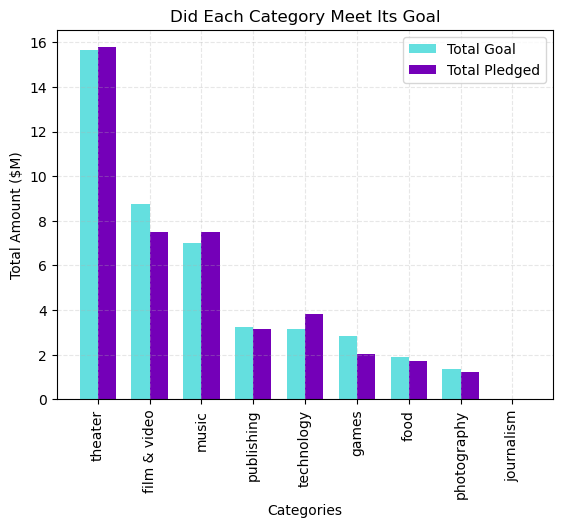

In [13]:
#Question 5 Visualization (got help with some code from chatgpt)
categories = df4.category
values1 = df4.total_goal
values2 = df4.total_pledged

# Number of categories
n = len(categories)

# Positions of the bars on the x-axis
ind = np.arange(n)

# Width of the bars
width = 0.35

# Plotting
fig, ax = plt.subplots()

# Bars for values1
bars1 = ax.bar(ind - width/2, values1, width, color='#64dfdf', label='Total Goal')

# Bars for values2
bars2 = ax.bar(ind + width/2, values2, width, color='#7400b8', label='Total Pledged')

# Adding labels, title, and custom x-axis tick labels
plt.xticks(rotation='vertical')
ax.set_xlabel('Categories')
ax.set_ylabel('Total Amount ($M)')
ax.set_title('Did Each Category Meet Its Goal')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.legend()
plt.grid(linestyle="--", alpha=.3)

# Display the chart
plt.show()

In [14]:
#Question 6: Which Subcategory Pledged more for Rock Category
query5 = """
    SELECT ct.category, s.subcategory, SUM(c.pledged) as total_pledged
    FROM campaign as c
    JOIN category as ct on c.category_id = ct.category_id
    JOIN subcategory as s on c.subcategory_id = s.subcategory_id
    WHERE ct.category = 'music'
    GROUP BY ct.category, s.subcategory
    ORDER BY total_pledged desc;
"""

df5 = pd.read_sql(text(query5), con=engine)
df5

,category,subcategory,total_pledged
0,music,rock,3603659
1,music,indie rock,2037576
2,music,electric music,781148
3,music,jazz,550966
4,music,metal,281185
5,music,world music,225563


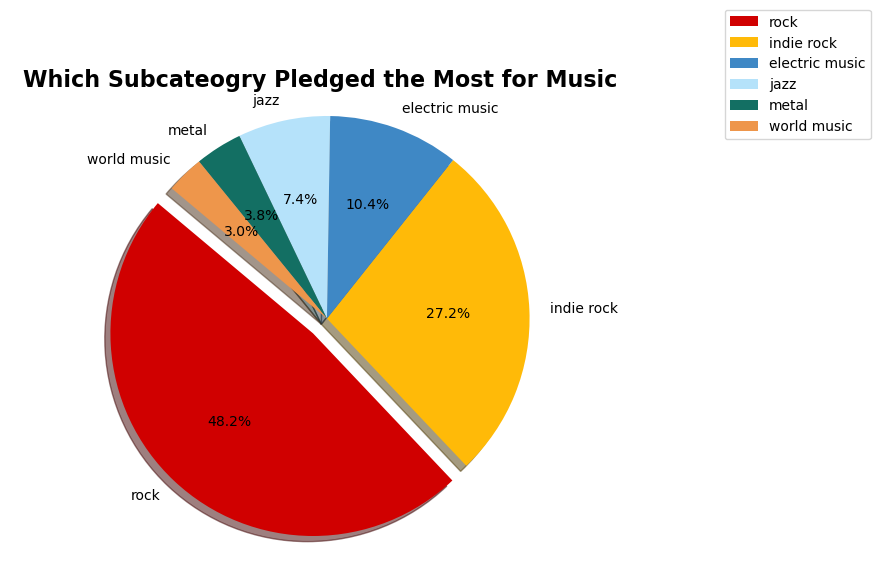

In [15]:
#Question 6 Visualization
colors = ["#d00000","#ffba08","#3f88c5","#b5e2fa","#136f63","#ee964b"]
# Set the explode levels for each slice
explode=[0.1, 0, 0, 0, 0, 0]
#2 make the canvas
plt.figure(figsize=(8,6))
#3 make the plot
plt.pie(df5.total_pledged, explode=explode, labels=df5.subcategory, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#4 customize
plt.title("Which Subcateogry Pledged the Most for Music", fontweight="bold", fontsize=16)
plt.axis("equal")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.2))
#5 Save show
plt.show()